# Ch 09 - Set 2

https://github.com/UCD-pbio-rclub/python_problems/wiki/Chapter-9-problem-set-2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### John

In [9]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_JohnD/master/datasets/diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [80]:
from collections import Counter
carats=np.sort(list(Counter(diamonds["carat"]).keys()))


In [125]:
## Recreate plots
# 1. carat vs price
# 2. carat vs price binned

In [ ]:
## There are 27 boxplots in the original image. 
# Create bins between 0.2 and 2.8 that cut the data into 27 semi-equal bins

In [119]:
carat_bins = pd.cut(diamons["carat"], 27,labels=False)
print(carat_bins.head())
print(len(Counter(carat_bins).keys()))
print(len(carat_bins))

0    0
1    0
2    0
3    0
4    1
Name: carat, dtype: int64
27
53900


In [122]:
## Add bin to the data
diamonds["bin"] = carat_bins

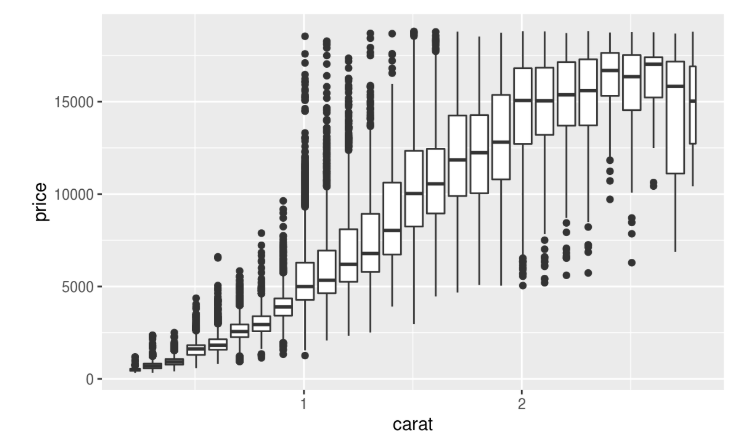

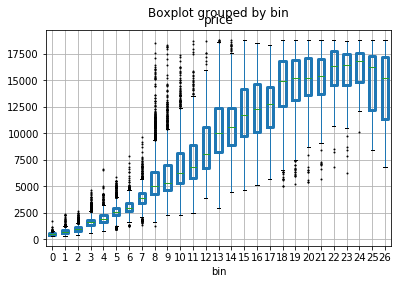

In [167]:
## https://matplotlib.org/gallery/statistics/bxp.html
diamonds.boxplot(column = 'price', by = "bin",
                 flierprops = dict(marker='o', markerfacecolor='black', markersize=1,linestyle='none'),
                 boxprops = dict(linewidth=3, color="black"))

### Min-Yao

In [169]:
xprs = pd.read_excel('https://github.com/UCD-pbio-rclub/python-data-analysis_MinYaoJ/raw/master/Expression%20Browser_CPM_practice.xlsx')

In [173]:
## Select the first 5 genes 
df = xprs.head(5)
df

,Name,6_c1,6_c2,6_c3,6_c4,6_c5,6_c6,6_c7,6_t1,6_t2,...,3_t5,2_c1,2_c2,2_c3,2_c4,2_c5,2_t1,2_t2,2_t3,2_t4
0,Solyc00g005000.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Solyc00g005005.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Solyc00g005040.3,0.000000,0.136237,0.000000,0.000000,0.000000,0.000000,0.000000,0.075741,0.30310,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Solyc00g005050.3,49.947944,50.680249,42.857629,46.142383,40.925485,49.050587,49.010294,47.224546,42.28247,...,46.069768,39.626619,33.60176,38.84896,28.487619,42.516459,47.526986,47.021348,51.069134,44.480035
4,Solyc00g005055.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [206]:
import re

In [219]:
## Create metadata with sample names
# use regexes to remove the replicate number
sampleGroups = [re.sub(pattern="..$",repl="",string=each) for each in df.columns[1:].tolist()]
Counter(sampleGroups)

Counter({'6_c': 7,
         '6_t': 7,
         '5_c': 5,
         '5_t': 7,
         '3_c': 5,
         '3_t': 5,
         '2_c': 5,
         '2_t': 4})

In [268]:
tmpXprs = df[df.Name == "Solyc00g005050.3"].T[1:]
tmpXprs["groups"] = sampleGroups
tmpXprs.head(5)


,3,groups
6_c1,49.9479,6_c
6_c2,50.6802,6_c
6_c3,42.8576,6_c
6_c4,46.1424,6_c
6_c5,40.9255,6_c


In [273]:
tmpXprs.columns = ['Solyc00g005050', 'groups']
tmpXprs.head()

,Solyc00g005050,groups
6_c1,49.9479,6_c
6_c2,50.6802,6_c
6_c3,42.8576,6_c
6_c4,46.1424,6_c
6_c5,40.9255,6_c


Text(0.5, 0.98, '')

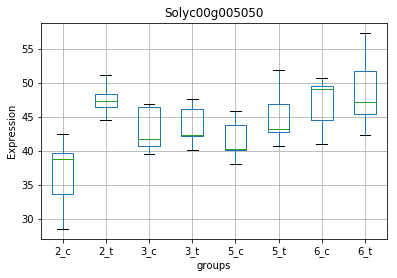

In [281]:
tmpXprs.boxplot(by="groups",column="Solyc00g005050")
plt.ylabel("Expression")
plt.suptitle("")

### Julin

1. Make a boxplot of hypocotyl length ("hyp") with the data plotted separately for 'species' and 'trt'. Try making this plot both with and without using facets.

2. Make a plot of the internode data, int1, int2, int3, and int4 where each internode is in a different facet. plot values for each trt and species. Layout the plot so that it is a 2X2 grid



In [285]:
tomato = pd.read_csv("https://raw.githubusercontent.com/UCD-pbio-rclub/python_problems/master/Tomato.csv")
tomato.head()

,shelf,flat,col,row,acs,trt,days,date,hyp,int1,...,petleng,leafleng,leafwid,leafnum,ndvi,lat,lon,alt,species,who
0,Z,1,B,1,LA2580,H,28,5/5/08,19.46,2.37,...,15.78,30.53,34.44,5.0,111,-9.5167,-78.0083,740,S. pennellii,Dan
1,Z,1,C,1,LA1305,H,28,5/5/08,31.28,3.34,...,12.36,22.93,13.99,4.0,120,-13.3833,-75.3583,3360,S. peruvianum,Dan
2,Z,1,D,1,LA1973,H,28,5/5/08,56.65,8.43,...,13.05,46.71,43.78,5.0,110,-16.2333,-71.7000,2585,S. peruvianum,Dan
3,Z,1,E,1,LA2748,H,28,5/5/08,35.18,0.56,...,8.08,26.82,33.28,5.0,105,-20.4833,-69.9833,1020,S. chilense,Dan
4,Z,1,F,1,LA2931,H,28,5/5/08,35.32,0.82,...,7.68,22.40,23.61,5.0,106,-20.9167,-69.0667,2460,S. chilense,Dan


In [323]:
groups = tomato["trt"] + "_" + tomato["species"]
groups = [re.sub(". |......$","",each) for each in groups]
Counter(groups)

Counter({'H_Spen': 60,
         'H_Speru': 105,
         'H_Sch': 102,
         'H_Schmiel': 109,
         'H_Shabroc': 119,
         'L_Spen': 72,
         'L_Speru': 112,
         'L_Sch': 105,
         'L_Schmiel': 117,
         'L_Shabroc': 107})

In [334]:
df=tomato[["hyp"]]
df["groups"]=groups
df.head()

/usr/local/Cellar/jupyter/1.0.0_4/libexec/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,hyp,groups
0,19.46,H_Spen
1,31.28,H_Speru
2,56.65,H_Speru
3,35.18,H_Sch
4,35.32,H_Sch


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

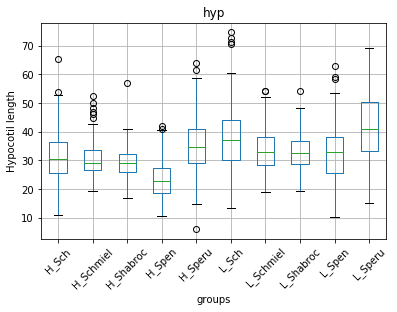

In [337]:
df.boxplot(by="groups",column="hyp")
plt.ylabel("Hypocotil length")
plt.suptitle("")
plt.xticks(rotation=45)

### Kae

Using the data here please make a bar graph showing the number of men and the number of women (a bar for each) that survived the trip on the titanic at each age point.

In [338]:
titanic = pd.read_csv("https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_KaeL/master/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [390]:
survivors_byAge_M = Counter(titanic[ (~np.isnan(titanic.Age)) & (titanic.Survived == 1) & (titanic.Sex == "male") ] ["Age"] )
survivors_byAge_F = Counter(titanic[ (~np.isnan(titanic.Age)) & (titanic.Survived == 1) & (titanic.Sex == "female") ] ["Age"] )

In [381]:
df_M=pd.DataFrame.from_dict(survivors_byAge_M, orient='index').reset_index()
df_F=pd.DataFrame.from_dict(survivors_byAge_F, orient='index').reset_index()

In [393]:
df_M = df_M.rename(columns={'index':'Age', 0:'Survivors'})
df_F = df_F.rename(columns={'index':'Age', 0:'Survivors'})
##
df_F=df_F.sort_values("Age")
df_M=df_M.sort_values("Age")

In [397]:
df_M.head()

,Age,Survivors
47,0.42,1
45,0.67,1
3,0.83,2
23,0.92,1
10,1.00,3


In [396]:
df_F.head()

,Age,Survivors
40,0.75,2
25,1.00,2
41,2.00,2
9,3.00,1
5,4.00,5


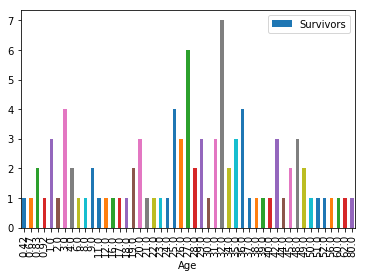

In [399]:
df_M.plot.bar(x="Age",y="Survivors")

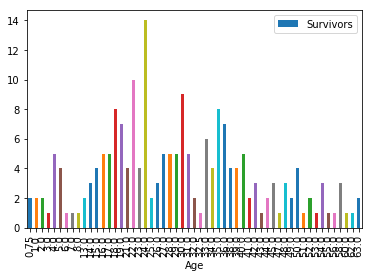

In [398]:
df_F.plot.bar(x="Age",y="Survivors")